### Notebook
- Creates Figure S1: Overview of pan-cancer cohort (sex/age)

In [1]:
import pandas as pd
import numpy as np
import os

from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
from matplotlib import gridspec 
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### 0. Global variables

In [2]:
MSS = 'MSS_only' 
mss_patients = np.loadtxt('../data/mss_tcga_patients.txt', dtype=str)

### 1. Load patients

In [3]:
# Remove sex-specific cancers for sex-specific analyses
print('Loading confident {} patients with removed sex-specific cancers '.format(MSS))
confident_patients_I_rm_sex_specific = pd.read_csv('../generated_data/confident_patient_I.age_sex_disease.{}.remove_sex_specific.tsv'.format(MSS), sep='\t', index_col=0)
confident_patients_II_rm_sex_specific = pd.read_csv('../generated_data/confident_patient_II.age_sex_disease.{}.remove_sex_specific.tsv'.format(MSS), sep='\t', index_col=0)

print('{} confident MHC-I, {} confident MHC-II'.format(len(set(confident_patients_I_rm_sex_specific.index)), 
                                                       len(set(confident_patients_II_rm_sex_specific.index))))
confident_patients_I_rm_sex_specific.head(2)

Loading confident MSS_only patients with removed sex-specific cancers 
2554 confident MHC-I, 2681 confident MHC-II


,scores,disease,age,sex
TCGA-85-8580,0.120879,LUSC,52.0,female
TCGA-IB-AAUM,1.249676,PAAD,76.0,male


In [6]:
# Keep sex-specific cancers for age-specific analyses
print('Loading confident {} patients with kept sex-specific cancers'.format(MSS))
confident_patients_I_kept_sex_specific = pd.read_csv('../generated_data/confident_patient_I.age_sex_disease.{}.kept_sex_specific.tsv'.format(MSS), sep='\t', index_col=0)
confident_patients_II_kept_sex_specific = pd.read_csv('../generated_data/confident_patient_II.age_sex_disease.{}.kept_sex_specific.tsv'.format(MSS), sep='\t', index_col=0)

print('{} confident MHC-I, {} confident MHC-II'.format(len(set(confident_patients_I_kept_sex_specific.index)), 
                                                       len(set(confident_patients_II_kept_sex_specific.index))))
confident_patients_I_kept_sex_specific.head(2)

Loading confident MSS_only patients with kept sex-specific cancers
3166 confident MHC-I, 3036 confident MHC-II


,scores,disease,age,sex
TCGA-85-8580,0.120879,LUSC,52.0,female
TCGA-A5-A0GV,3.524218,UCEC,67.0,female


### 2. Plot Figure S1

##### 2A. Aggregate patients
- Get all unique patients from confidently typed patients with MHC-I and MHC-II

In [9]:
# Pool patients with removed sex-specific cancers (sex analysis)
total_rm_sex_specific_df = confident_patients_I_rm_sex_specific.copy()
total_rm_sex_specific_df = total_rm_sex_specific_df.append(confident_patients_II_rm_sex_specific)
total_rm_sex_specific_df.reset_index(inplace=True)
total_rm_sex_specific_df.drop_duplicates(subset=['index'], inplace=True)

total_rm_sex_specific_df.head(2)

,index,scores,disease,age,sex
0,TCGA-85-8580,0.120879,LUSC,52.0,female
1,TCGA-IB-AAUM,1.249676,PAAD,76.0,male


In [10]:
# Pool patients with kept sex-specific cancers (age analysis)
total_kept_sex_specific_df = confident_patients_I_kept_sex_specific.copy()
total_kept_sex_specific_df = total_kept_sex_specific_df.append(confident_patients_II_kept_sex_specific)
total_kept_sex_specific_df.reset_index(inplace=True)
total_kept_sex_specific_df.drop_duplicates(subset=['index'], inplace=True)

total_kept_sex_specific_df.head(2)

,index,scores,disease,age,sex
0,TCGA-85-8580,0.120879,LUSC,52.0,female
1,TCGA-A5-A0GV,3.524218,UCEC,67.0,female


##### 2B. Plot patients

Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/S1.sex_age_counts.MSS_only.pdf


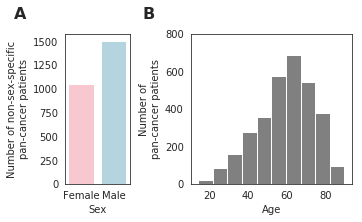

In [15]:
plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.2, 3]) 

############################
# A - pancancer sex counts #
############################

plt.subplot(gs[0])
data = pd.DataFrame(total_rm_sex_specific_df['sex'].value_counts()).T
ax = sns.barplot(data=data, order=['female', 'male'], palette=['pink', 'lightblue'])
plt.xlabel('Sex'), plt.ylabel('Number of non-sex-specific\npan-cancer patients')
plt.xticks([0,1], ['Female', 'Male'])
plt.text(-0.8, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')

##################################
# B - pancancer age distribution #
##################################

fig = plt.subplot(gs[1])
plt.hist(x=total_kept_sex_specific_df['age'].values, bins=10, color='grey')
plt.xlabel('Age')
plt.ylabel('Number of\npan-cancer patients')
plt.yticks(range(0,801,200))
plt.text(-0.3, 1.1, 'B', transform=fig.transAxes, fontsize=16,  weight='bold')

plt.tight_layout(pad=0.6, h_pad=1)

savepath = '../figures/S1.sex_age_counts.{}.pdf'.format(MSS)
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()

Saving to ../figures/S1.sex_age_counts.MSS_only.pdf


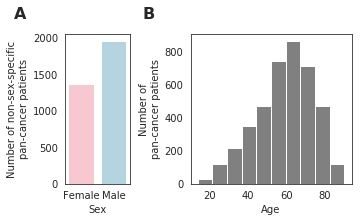

In [11]:
plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.2, 3]) 

############################
# A - pancancer sex counts #
############################

plt.subplot(gs[0])
data = pd.DataFrame(total_rm_sex_specific_df['sex'].value_counts()).T
ax = sns.barplot(data=data, order=['female', 'male'], palette=['pink', 'lightblue'])
plt.xlabel('Sex'), plt.ylabel('Number of non-sex-specific\npan-cancer patients')
plt.xticks([0,1], ['Female', 'Male'])
plt.text(-0.8, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')

##################################
# B - pancancer age distribution #
##################################

fig = plt.subplot(gs[1])
plt.hist(x=total_kept_sex_specific_df['age'].values, bins=10, color='grey')
plt.xlabel('Age')
plt.ylabel('Number of\npan-cancer patients')
plt.yticks(range(0,801,200))
plt.text(-0.3, 1.1, 'B', transform=fig.transAxes, fontsize=16,  weight='bold')

plt.tight_layout(pad=0.6, h_pad=1)

savepath = '../figures/S1.sex_age_counts.{}.pdf'.format(MSS)
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()